# Distribution of Run Duration

This code works to create a histogram plot to visual the distribution of the run durations in spiders. As well, we want to compare the distributions so we included the original data and resampled data (averaged by rows of 2).

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns

#Read Spider activity CSV file
filename = 'Metazygia wittfeldae Monitor 1 activity_DD_binary_run_duration'
filename2 = "Metazygia wittfeldae Monitor 1 activity_DD_reindex_binary_run_duration"
df = pd.read_csv(filename + '.csv', index_col = 0)
df2 = pd.read_csv(filename2 + '.csv', index_col = 0)

### Histogram Formatting

This function helps format and label our histograms.

In [103]:
def draw_histogram(col, ylim):    
    axes[0].set_title(col)
    axes[1].set_title(col + ' Resampled')
    axes[0].set_xlabel('Run Duration')
    axes[1].set_xlabel('Run Duration')
    axes[0].set_ylim(0, ylim)
    axes[1].set_ylim(0, ylim/2)
    plt.tight_layout()

### Histogram Drawing

This code works to loop through every column of the dataframe and plot that individual column. We set the bins so that our data stays within the same range and is easy to compare. We call the previous function, which formats the histograms, and plot the original data on the left (axis 0) and the reindexed data on the right (axis 1).

/var/folders/w1/nrdnwqdx0_z6lhjkmrfql73w0000gn/T/ipykernel_2564/1992179949.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2)


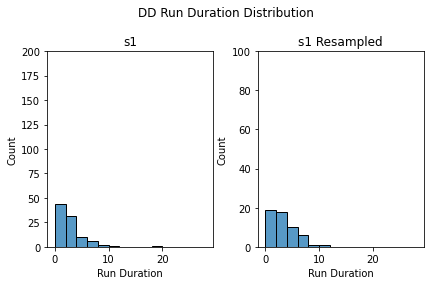

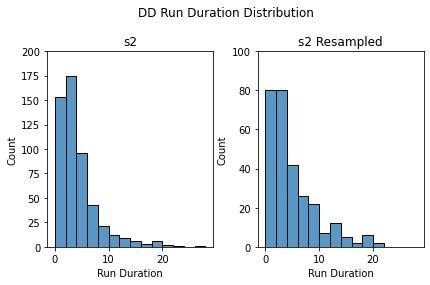

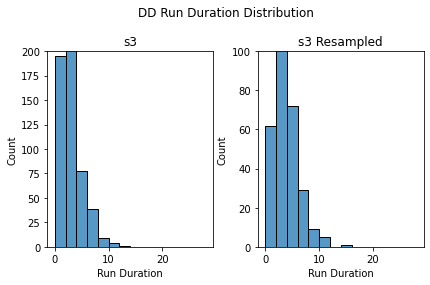

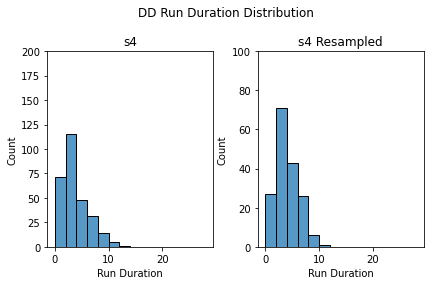

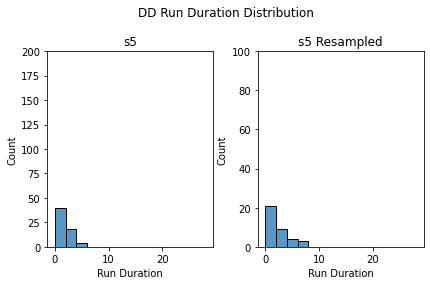

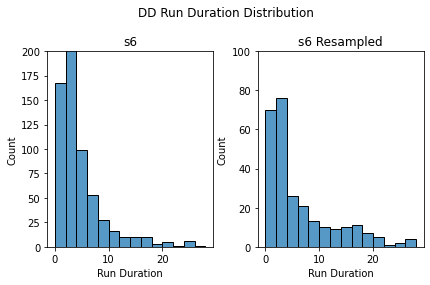

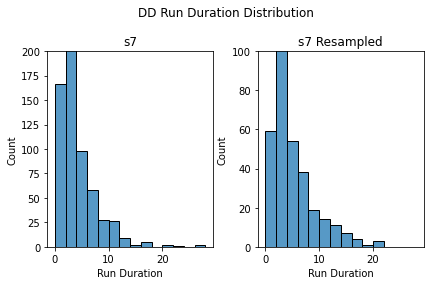

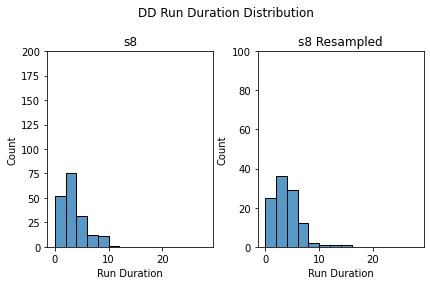

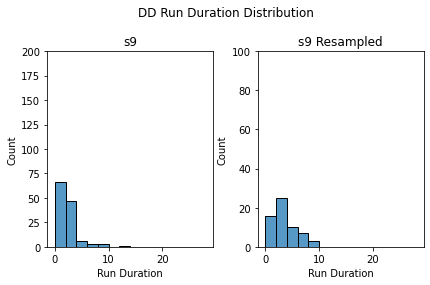

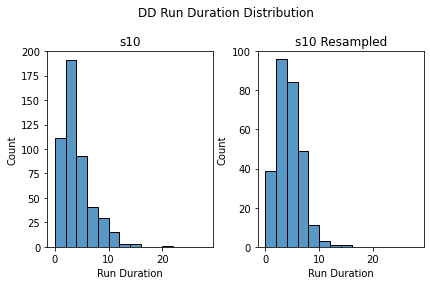

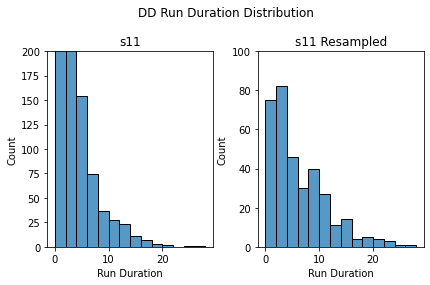

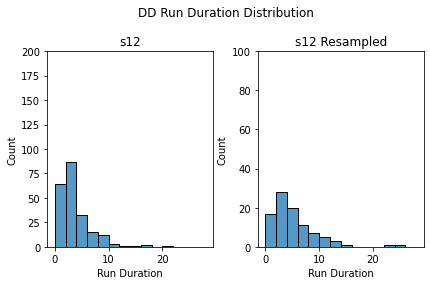

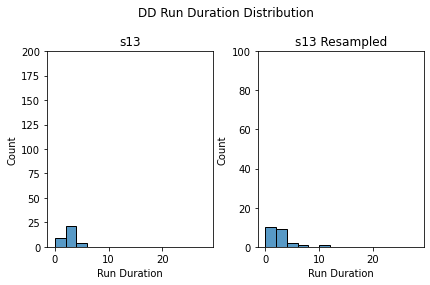

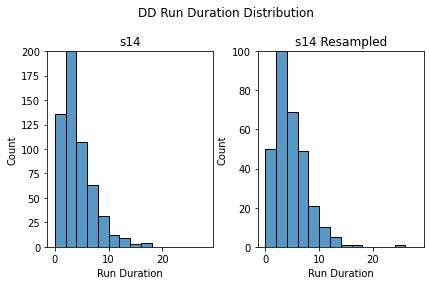

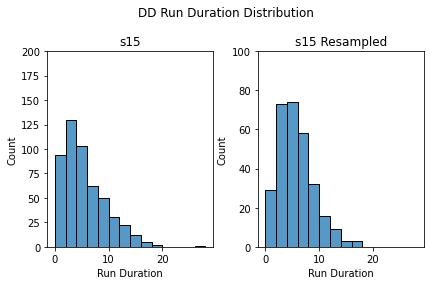

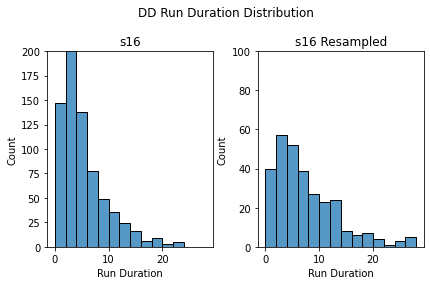

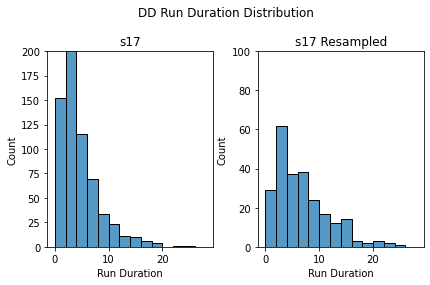

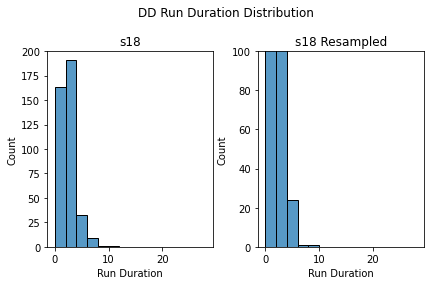

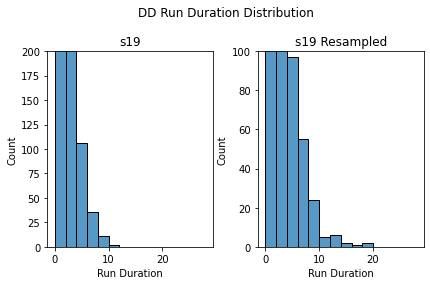

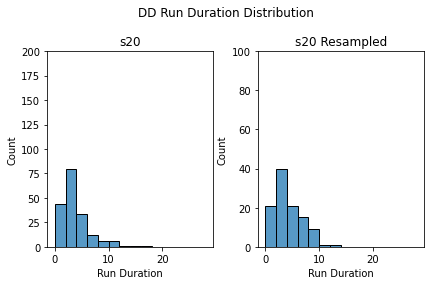

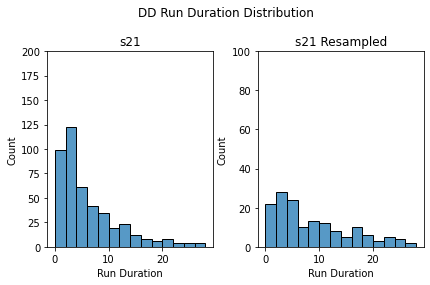

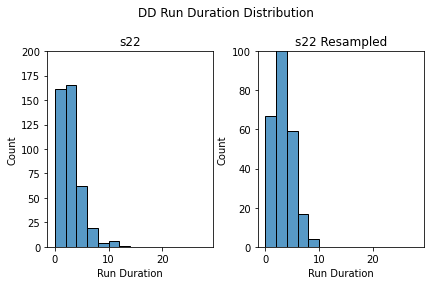

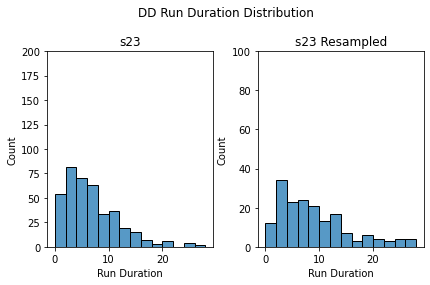

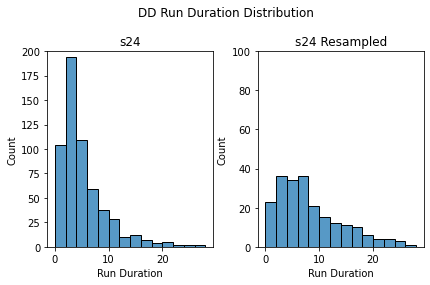

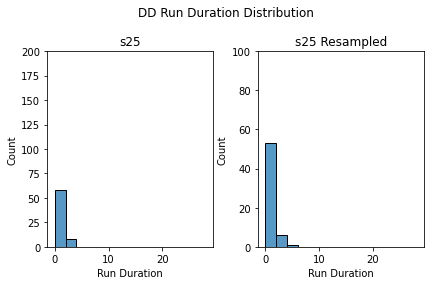

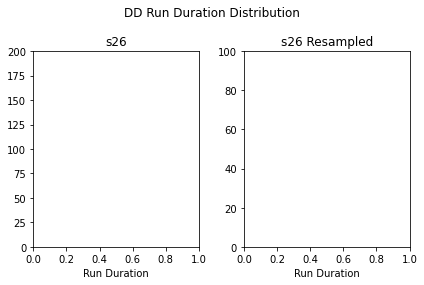

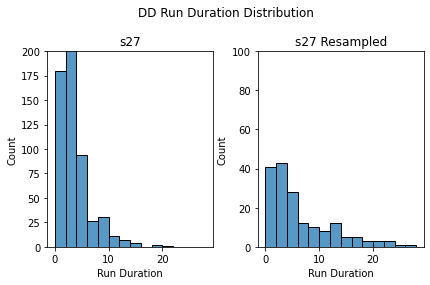

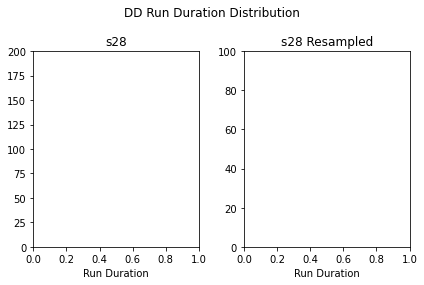

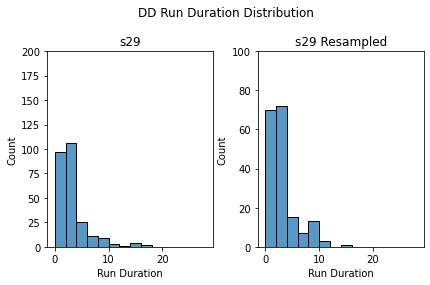

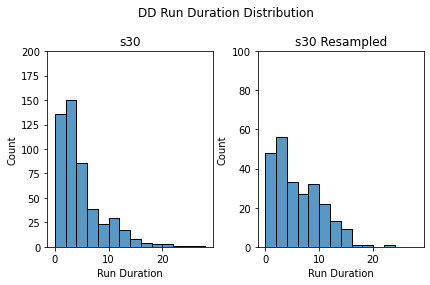

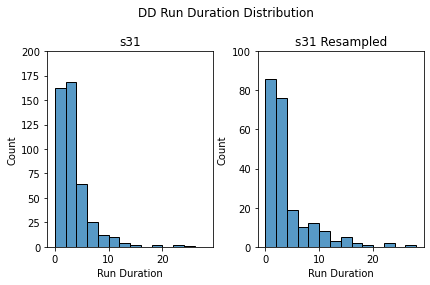

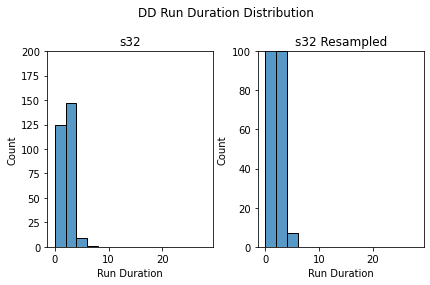

In [136]:

for i, col in enumerate(df.columns):
    bin_size = np.arange(0, 30, 2, dtype= int)
    ylim = 200
    
    fig, axes = plt.subplots(1, 2)
    fig.suptitle('DD Run Duration Distribution')

    draw_histogram(col, ylim)
    sns.histplot(data = df, x = col, ax = axes[0], bins = bin_size)
    sns.histplot(data = df2, x = col, ax = axes[1], bins = bin_size)
    
    #plt.savefig(col + "_DD.jpeg")



In [109]:
from statsmodels.distributions.empirical_distribution import ECDF

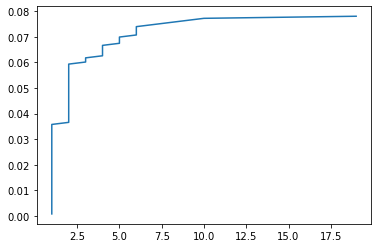

In [144]:
ecdf = ECDF(df['s1'])
plt.plot(ecdf.x, ecdf.y)
plt.show()

In [130]:
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))

P(x<20): 0.426
P(x<40): 0.431
P(x<60): 0.431


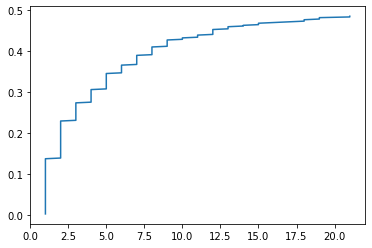

In [131]:
ecdf2 = ECDF(df2['s2'])
plt.plot(ecdf2.x, ecdf2.y)
plt.show()

In [132]:
print('P(x<20): %.3f' % ecdf2(20))
print('P(x<40): %.3f' % ecdf2(40))
print('P(x<60): %.3f' % ecdf2(60))

P(x<20): 0.482
P(x<40): 0.485
P(x<60): 0.485


<AxesSubplot:title={'center':'DD Run Duration Empirical Distribution'}, xlabel='Run Duration', ylabel='Probability'>

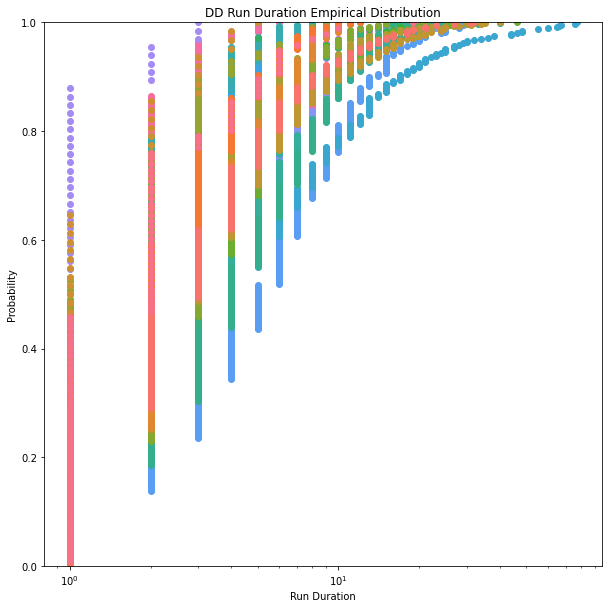

In [193]:

plt.figure(figsize=(10,10))
plt.title('DD Run Duration Empirical Distribution')
plt.xlabel('Run Duration')
plt.ylabel('Probability')
sns.ecdfplot(data=df.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', log_scale = True)

<AxesSubplot:title={'center':'Reindexed DD Run Duration Empirical Distribution'}, xlabel='Run Duration', ylabel='Probability'>

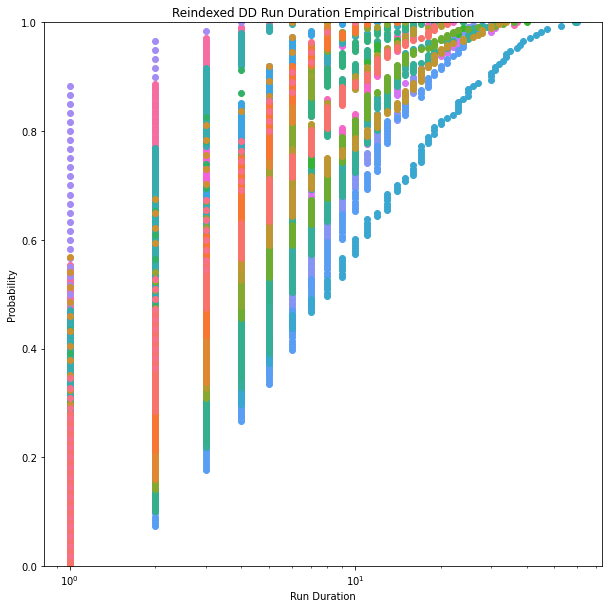

In [192]:
plt.figure(figsize=(10,10))
plt.title('Reindexed DD Run Duration Empirical Distribution')
plt.xlabel('Run Duration')
plt.ylabel('Probability')
sns.ecdfplot(data=df2.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', log_scale = True)

<AxesSubplot:title={'center':'Resampled DD Run Duration Empirical Distribution'}, xlabel='Run Duration', ylabel='Probability'>

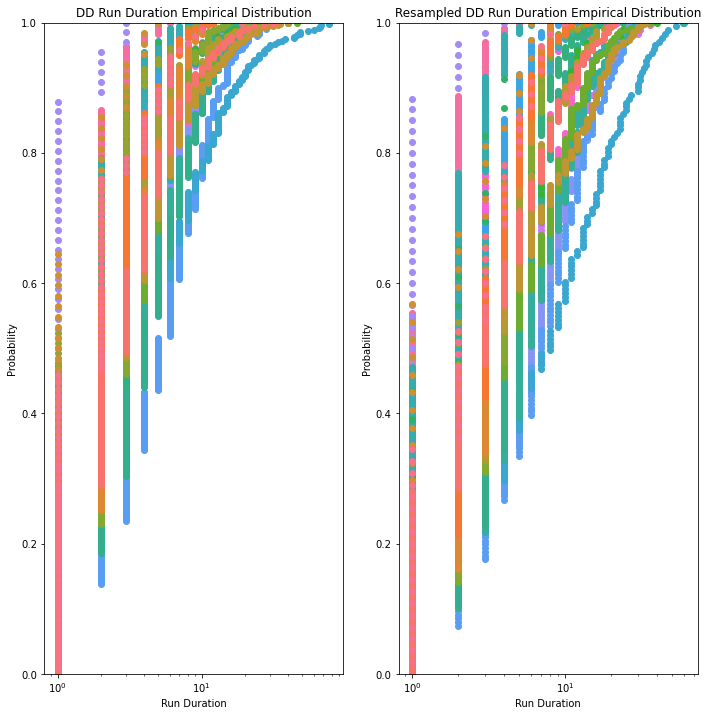

In [208]:
fig, axes = plt.subplots(1, 2, figsize = (10, 10))
axes[0].set_title('DD Run Duration Empirical Distribution')
axes[1].set_title('Resampled DD Run Duration Empirical Distribution')
axes[0].set_xlabel('Run Duration')
axes[1].set_xlabel('Run Duration')
axes[0].set_ylabel('Probability')
axes[1].set_ylabel('Probability')
plt.tight_layout()
sns.ecdfplot(data=df.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[0], log_scale = True)
sns.ecdfplot(data=df2.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[1], log_scale = True)

<AxesSubplot:title={'center':'Resampled DD Run Duration Empirical Distribution'}, xlabel='Run Duration', ylabel='Probability'>

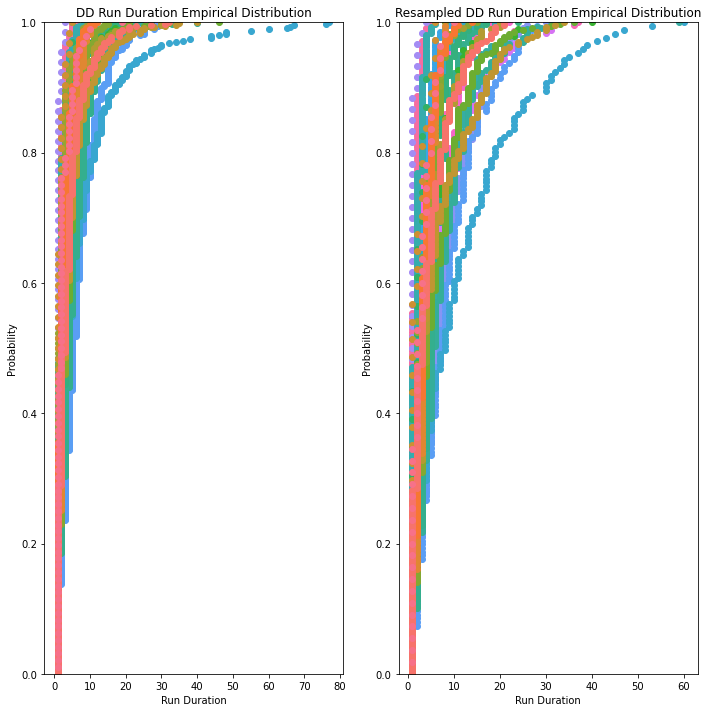

In [211]:
fig, axes = plt.subplots(1, 2, figsize = (10, 10))
axes[0].set_title('DD Run Duration Empirical Distribution')
axes[1].set_title('Resampled DD Run Duration Empirical Distribution')
axes[0].set_xlabel('Run Duration')
axes[1].set_xlabel('Run Duration')
axes[0].set_ylabel('Probability')
axes[1].set_ylabel('Probability')
#axes[0].set_xlim(0, 100)
#axes[1].set_xlim(0, 100)
plt.tight_layout()
sns.ecdfplot(data=df.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[0])
sns.ecdfplot(data=df2.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[1])

<AxesSubplot:title={'center':'Resampled DD Run Duration Empirical Distribution'}, xlabel='Run Duration', ylabel='Probability'>

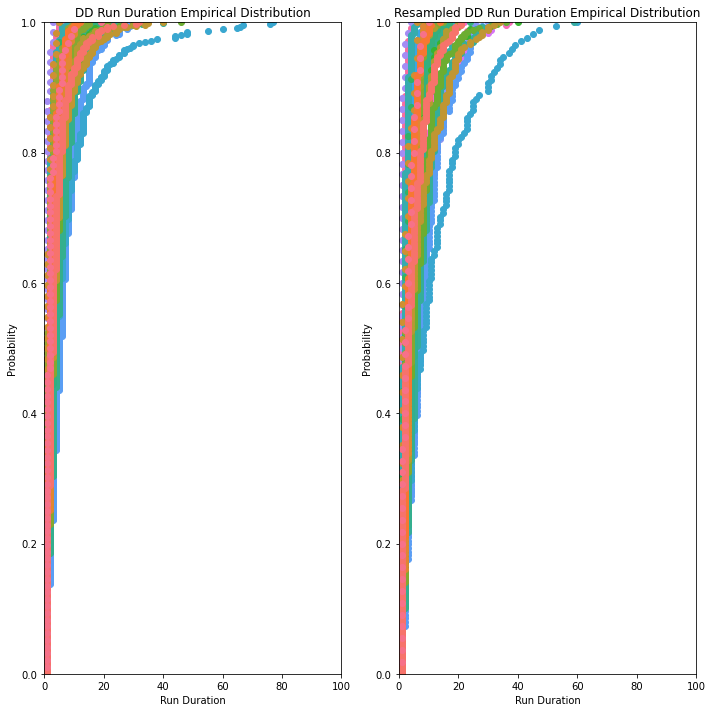

In [212]:
fig, axes = plt.subplots(1, 2, figsize = (10, 10))
axes[0].set_title('DD Run Duration Empirical Distribution')
axes[1].set_title('Resampled DD Run Duration Empirical Distribution')
axes[0].set_xlabel('Run Duration')
axes[1].set_xlabel('Run Duration')
axes[0].set_ylabel('Probability')
axes[1].set_ylabel('Probability')
axes[0].set_xlim(0, 100)
axes[1].set_xlim(0, 100)
plt.tight_layout()
sns.ecdfplot(data=df.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[0])
sns.ecdfplot(data=df2.filter(like="s", axis="columns"), legend = False,
                     marker = 'o', linestyle = 'none', ax = axes[1])